In [1]:
import wisps
import splat
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
binar=pd.read_pickle(wisps.OUTPUT_FILES+'/binary_templates.pkl').dropna()

In [3]:
#binar['system']=binar.spectrum.apply(wisps.classify, stripunits=True)

In [4]:
primary_spts=np.vstack(binar.primary.apply(lambda x: [wisps.make_spt_number(x[0]), wisps.make_spt_number(x[1])]).values)

In [5]:
system_spts=binar.system.apply(wisps.make_spt_number).values

In [6]:
df=pd.DataFrame()
df['prim']=primary_spts[:,0]
df['sec']=primary_spts[:,1]
df['sys']=system_spts

In [7]:
import seaborn as sns

In [8]:
cmap=sns.diverging_palette(220, 20, sep=20, as_cmap=True)

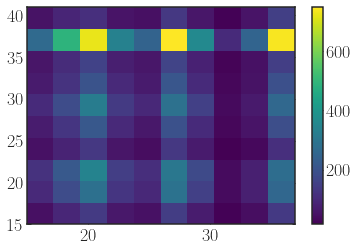

In [9]:
h=plt.hist2d(primary_spts[:,0], primary_spts[:,1], cmap='viridis')
cb=plt.colorbar()

In [10]:
df=(df[(df.prim<=df.sec) &( df.sys >15.)]).reset_index(drop=True).applymap(float)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
#df['diff']=df.prim-df.sec

In [ ]:
#df=(df[df.new_prim>=df.new_sec]).reset_index(drop=True).applymap(float)

In [ ]:
df['diffr']=df['prim']-df['sec']

In [ ]:
kdspt=wisps.kernel_density(df['diffr'].values)

In [ ]:
df['dens']=kdspt(df['diffr'].values)

In [ ]:
#sns.kdeplot?

In [ ]:
fig, (ax, ax1)=plt.subplots(figsize=(12,4), ncols=2)
df.plot.hexbin(x='prim', y='sec', C='sys', reduce_C_function=np.nanmedian, gridsize=15, cmap='viridis', ax=ax)
ax.set_xlabel('Primary', fontsize=18)
ax.set_ylabel('Secondary', fontsize=18)
#fig.axes[-1].set_title('Composite', fontsize=18)
#plt.tight_layout()



sns.kdeplot(df.prim, df.sys,  ax=ax1, shade=False)
c=ax1.scatter(df.prim, df.sys, c='k', s=5.)
ax1.set_xlabel('Primary', fontsize=18)
ax1.set_ylabel('System', fontsize=18)


fig.axes[-1].set_title('System', fontsize=18)

ax1.minorticks_on()
ax.minorticks_on()

ax1.plot(df.prim, df.prim, c='k')

for a in [ax, ax1]:
    a.set_xticks([15, 20, 25, 30, 35, 40])
    a.set_xticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    a.set_yticks([15, 20, 25, 30, 35, 40])
    a.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    a.set_xlim([16, 40])
    a.set_xlim([16, 40])
    
#cbar=plt.colorbar(c)
#ax.set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    

#fig.axes[-2].set_yticks([15, 20, 25, 30, 35, 40])
#fig.axes[-2].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])

#fig.axes[-1].set_yticks([15, 20, 25, 30, 35, 40])
#fig.axes[-1].set_yticklabels(['M5', 'L0', 'L5', 'T0', 'T5', 'Y0'])
    
plt.tight_layout()

plt.savefig(wisps.OUTPUT_FIGURES+'/composite_types.pdf', bbox_inches='tight')

In [ ]:
df.to_pickle(wisps.OUTPUT_FILES+'/binary_lookup_table.pkl')